# SpyNet
A simple framework for simulating interactions between multiple neurons. This is a quick get started guide for the same.

Start by importing the necessary modules

In [1]:
from network import SpyNet
import currents
import numpy as np

```currents``` module helps in building various types of inputs to the network.

```SpyNet``` is the class which holds our network. 

In [2]:
s_net = SpyNet()

We can now start adding neurons to our network.
<br><br>
```SpyNet``` has a method ```addNeuron``` which allows you to add neurons to the network.
<br><br>
```addNeuron(self, n_in=1, in_dists=None, n_out=1, out_delays=None)```
<br><br>
Parameters:
<br>
&emsp;n_in (int): number of dendrites taking input.
<br>
&emsp;in_dists (list): list of distances of synapses to soma along each dendrite (in cm). Typical values are around 0.1cm.
<br>
&emsp;n_out (int): number of postsynaptic connections.
<br>
&emsp;out_delays (list): list of delays from soma to each axonal terminal.
<br><br>
Returns:
<br>
&emsp;n_id (int): the id of the neuron. This is equal to the number of neurons previously present in the network.    

In [3]:
s_net.addNeuron(1, [0.1], 1, [5])
s_net.addNeuron(1, [0.11], 1, [7])
s_net.addNeuron(2, [0.17, 0.06], 2, [10, 7])
s_net.addNeuron(1, [0.05], 1, [5])
s_net.addNeuron(1, [0.07], 1, [5])

4

Now that we have 4 neurons in our network, we can connect them using synapses.<br>
<br>
The method used for this is ```connect```.<br>
<br>
```connect(self, presyn_id, postsyn_id, syn_type)```<br>
<br>
Parameters:<br>
&emsp;presyn_id (list): list with 2 elements: presynaptic neuron id and index of the axon in the presynaptic neuron.<br>
&emsp;postsyn_id (list): list with 2 elements: postsynaptic neuron id and index of the dendrite in the postsynaptic neuron.<br>
&emsp;syn_type (str): the type of synapse to be used. Allowed values are 'nmda' and 'non-nmda'.<br>
<br>
Returns:<br>
&emsp;syn_id (int): the id of the synapse. This is the number of synapses previously present in the network.


In [4]:
s_net.connect([0,0],[2,0],'non-nmda')
s_net.connect([1,0],[2,1],'nmda')
s_net.connect([2,0],[3,0],'non-nmda')
s_net.connect([2,1],[4,0],'nmda')

3

Now the network is ready with its neurons connected with each other.<br>
<br>
We now have to give an input to our network. The ```currents``` module provides useful methods for this.<br>
<br>
The class ```CInput``` is a container for the functions which can be generated.

The most useful functions are step and pulse. These can be generated using the classes ```CStep``` and ```CPulse```.<br>
<br>
```CStep(mag, start_time=0, timestep=0.001)```<br>
```CPulse(mag, width, start_time=0, timestep=0.001)```<br>
<br>
Any arbitrary function can be generated using ```CPulse``` with appropriate values of ```mag```, ```width``` and ```start_time```.

Now let us generate two ```CInput```s to be given to two neurons.

In [5]:
c1 = currents.CInput()
c1.add(currents.CStep(0.1))
c2 = currents.CInput()
c2.add(currents.CStep(0.2))

We're now ready to simulate the network.<br>
<br>
```SpyNet``` has a builtin method ```simulate ``` which simulates the network with given inputs for a given time and returns the somatic membrane potentials of each neuron and associated timepoints.<br>
<br>
If you want to probe for other points like voltages at axon terminals, synaptic currents, etc. there's another method ```simulate_step``` which simulates one timestep at a time. One can run this in a loop and measure the various variables.

```simulate(inp_index, inps, end_time=100, timestep=0.001)```<br>
<br>
Parameters:<br>
&emsp;inp_index (list): list of neurons to which external inputs are to be given.<br>
&emsp;inps (list): list of inputs to each neuron. Each element is a list of inputs to each dendrite of that specific neuron.<br>
&emsp;end_time (float): simulation time (in milliseconds).<br>
&emsp;timestep (float): duration of each simulation step (in milliseconds).<br>
<br>
Returns:<br>
&emsp;potentials (np.ndarray): a numpy array of shape (number_of_neurons, number_of_timepoints) containing somatic membrane potentials of every neuron at all timepoints.<br>
&emsp;timepoints (np.ndarray): an array of values of t at all timesteps.


Running the simulation can take quite some time. If running on a CPU you might wanna go grab a coffee, have a walk and come back.

In [6]:
potentials, timepoints = s_net.simulate([0,1],[[c1],[c2]], end_time=50)

Total simulation time: 50.0ms
Starting simulation....
Progress: [========================================>] 50.0/50.0ms
Time taken: 187.10s


We can plot the simulated results using ```matplotlib.pyplot```

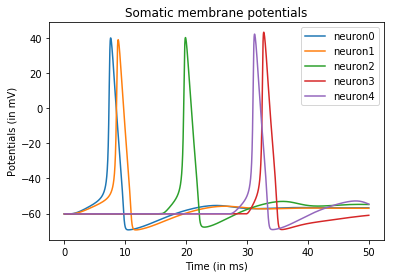

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(potentials.shape[0]):
    plt.plot(timepoints, potentials[i,:], label = 'neuron'+str(i))
plt.legend()
plt.title('Somatic membrane potentials')
plt.xlabel('Time (in ms)')
plt.ylabel('Potentials (in mV)')
plt.show()

Use the method ```reset``` to reset all neurons and synapses in the network.<br>
Use ```clear``` to remove all neurons and synapses and start afresh.<br>
You can now try simulating the system with other inputs, different configurations, changed parameters, etc.<br>
<br>
Feel free to play around with the source code. Have fun! :)

__Note__: This is a project under development. Future work includes addition of inhibitory synapses, branching dendrites among other things. Please drop a [mail](mailto:sanjeet029@gmail.com) if you have any suggestions or want to collaborate.